In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("ReidentificationTests.csv")

In [38]:
def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x), string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str):
    for index in range(len(df)):
        colum: pd.DataFrame = df.iloc[index]
        plt.plot(stringToLst(colum["Values"]),
                 label = "%s + %s" %(colum['Identification_Model'], colum['Metric']))
    plt.title(title)
    plt.xlabel("Posiciones de la calificación")
    plt.ylabel("Precisión")
    plt.grid(True)
    plt.legend(loc='lower right')

def plotCMC(df, query, title):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title)

## RetinaFace

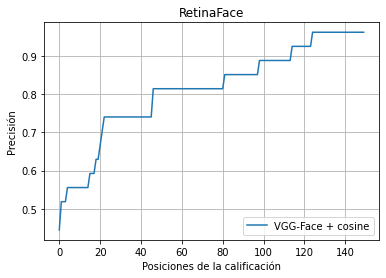

In [39]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

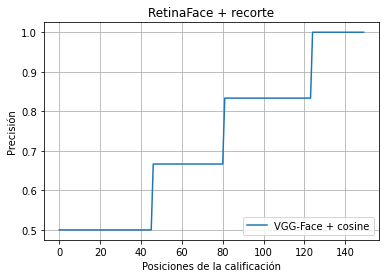

In [40]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

## Img2pose

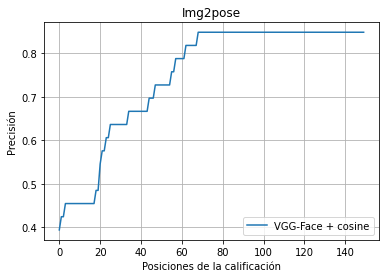

In [41]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

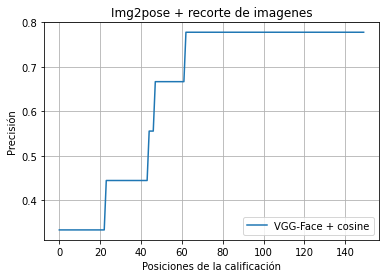

In [42]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")